# Experimentando classificação com diferentes _datasets_

Utilizando o dataset de toras previamente cortadas para treino.

Utilizando o dataset de toras cortadas pelos algoritmos de preprocessamento em `./img_edit.py`.

Utilizando melhor combinação de fatores para calculo do LBP:
  - utilizando 8 pontos;
  - aplicando limiar de otsu para menores.

## Importando bibliotecas

## Analisando desempenho com KNN

> Descomente _imports_ caso não tenha executado células superiores

In [1]:
# # importado de células anteriores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn() # Deve ser chamada antes dos imports no sklearn

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# valor dos arquivos csv gerados de
TESTE = 5
TREINO = 6

N_POINTS = [4, 8]
FUNC_NAMES = ['ambos', 'menor', 'maior']

TRAIN_NAMES = ['broca', 'fissura', 'musgo', 'quebra']
TARGET_NAMES = ['normal', 'broca', 'fissura', 'musgo']
MATCH_CLASSES = ['broca', 'fissura', 'musgo']

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)
seed_arr

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


array([3794, 4404, 3261, 2189, 6699, 6417, 7922, 6120, 2397, 3399, 4367,
       4525, 1780, 4306, 3072, 1228, 2835, 2937, 7859, 6996, 6384, 7961,
       7939, 3506, 4103, 4439, 2552, 1849, 7861, 4227])

Para 4 pontos:


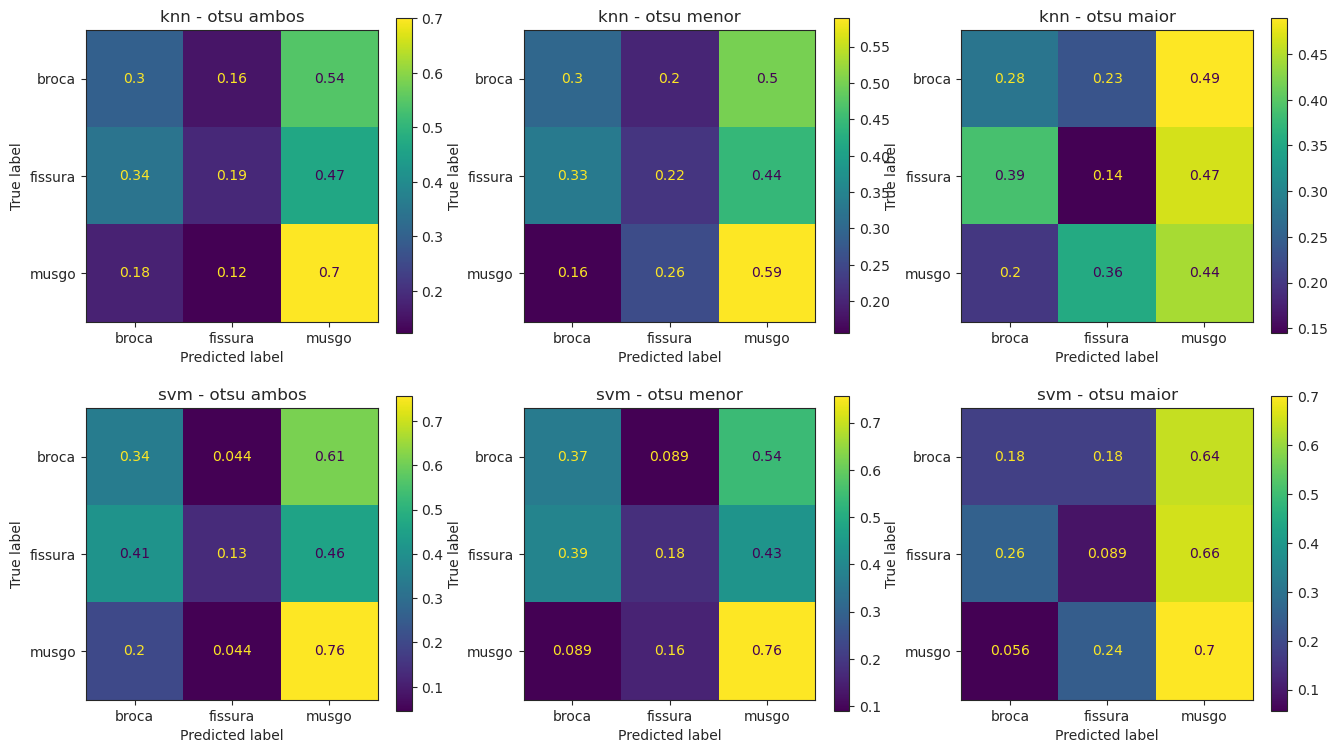

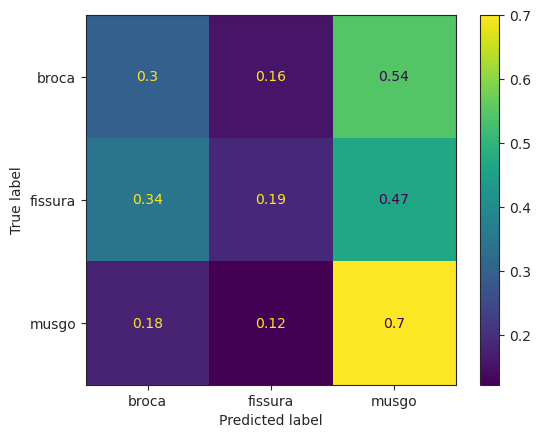

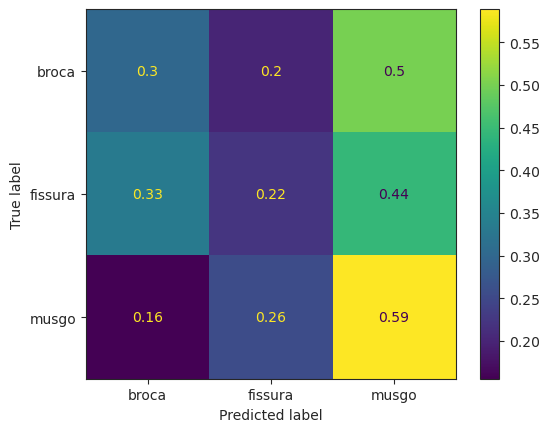

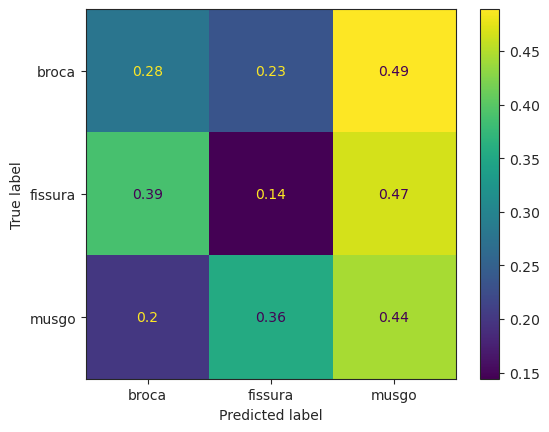

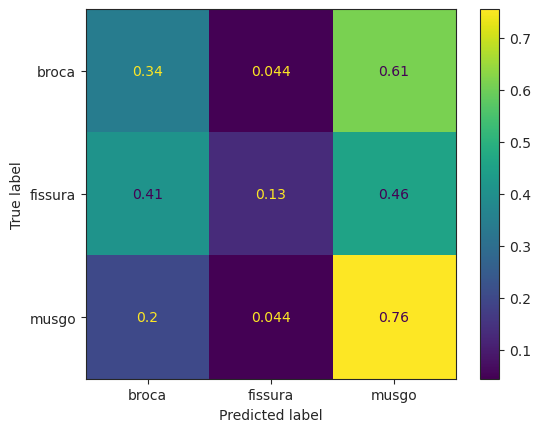

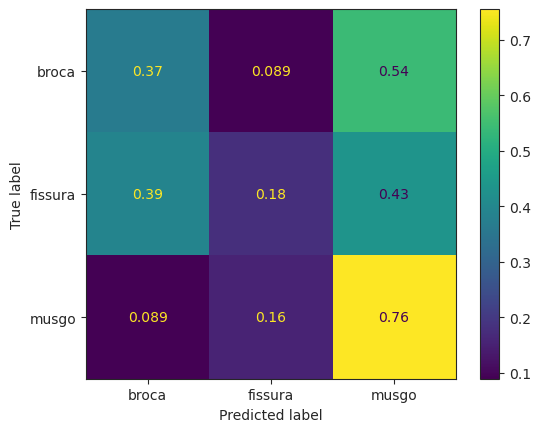

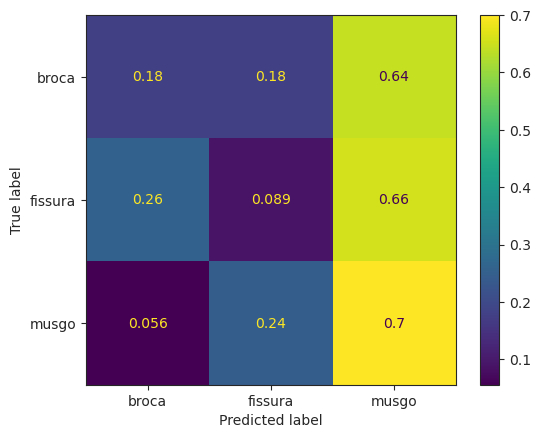

Para 8 pontos:


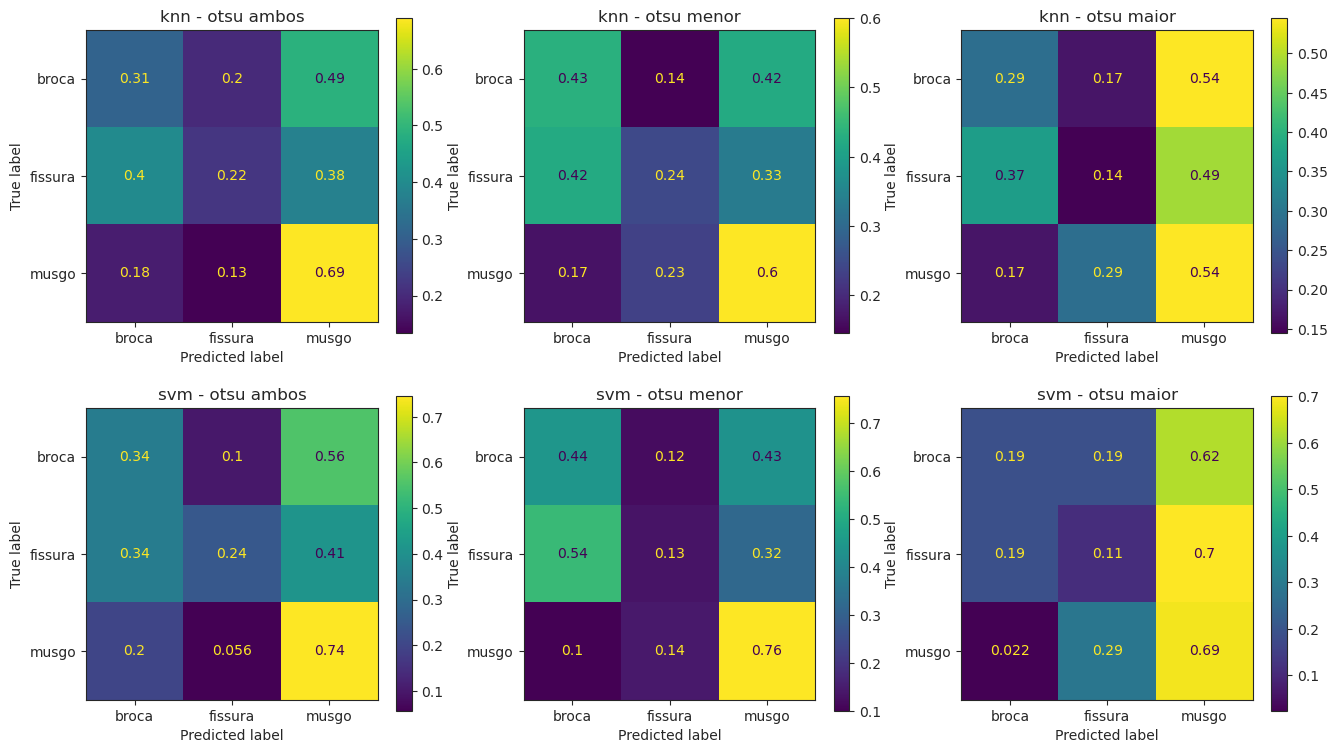

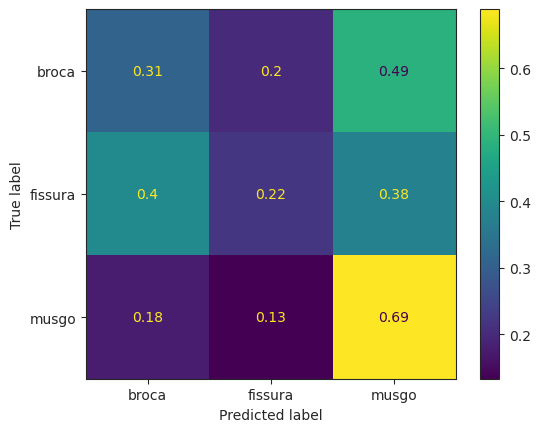

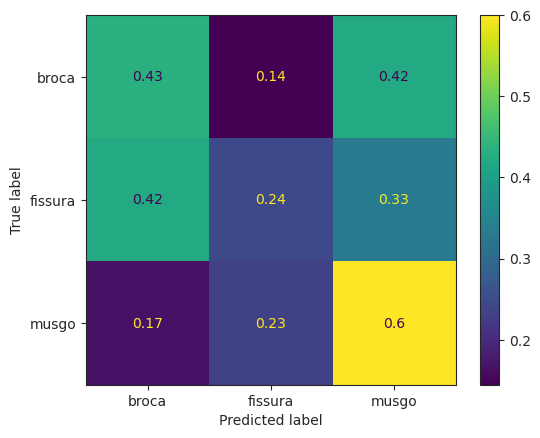

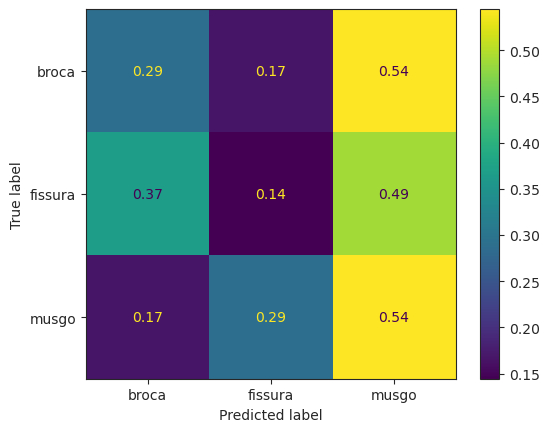

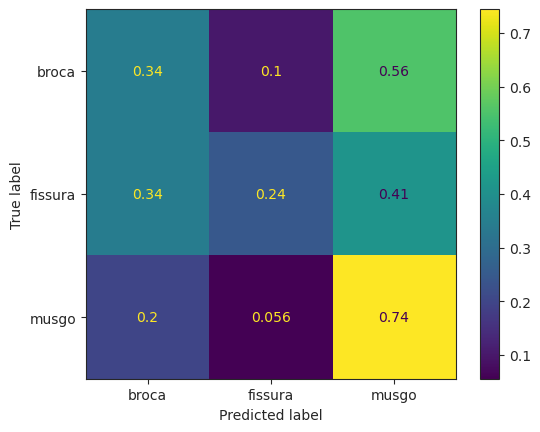

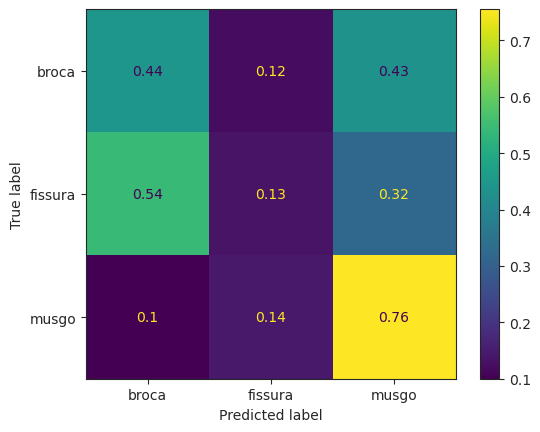

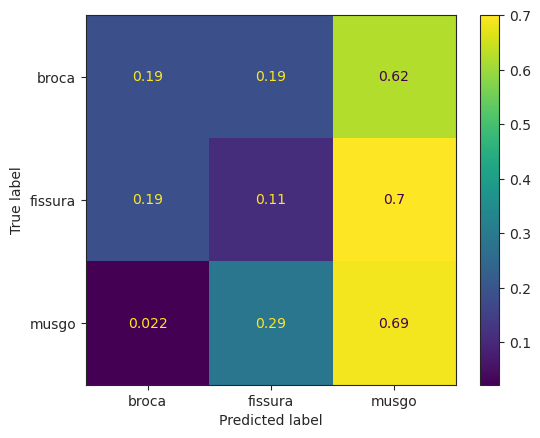

In [2]:
sns.set_style('ticks')

COLUMNS = ['acc', 'otsu', 'pontos', 'classificador']
combinations = []

classificadores = [
  ('knn', KNeighborsClassifier()),
  ('svm', make_pipeline(StandardScaler(),
                        SVC(cache_size=600)))
]

for row, n_points in enumerate(N_POINTS):
  fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
  print(f'Para {n_points} pontos:')

  for i, (clf_name, clf) in enumerate(classificadores):
    for j, name in enumerate(FUNC_NAMES):
      # classes: {0:'broca', 1:'fissura', 2:'musgo', 3:'quebra'}
      data_treino = pd.read_csv(f'./csvs/prepro_{TREINO}-{name}-P{n_points}.csv').query('target != 3')
      y_train = data_treino.pop('target').values
      X_train = data_treino.values

      # classes: {0:'normal', 1:'broca', 2:'fissura', 3:'musgo'}
      data_teste = pd.read_csv(f'./csvs/prepro_{TESTE}-{name}-P{n_points}.csv').query('target != 0')
      y_test = data_teste.pop('target').values
      X_test = data_teste.values

      # classes: {0:'broca', 1:'fissura', 2:'musgo'}
      y_test -= 1 # corrigindo valores das classes para correspondência entre datasets

      # Treinando classificador
      clf.fit(X_train, y_train)

      combinations.append([
        clf.score(X_test, y_test),
        name,
        n_points,
        clf_name])

      ConfusionMatrixDisplay.from_estimator(
        estimator=clf,
        X=X_test,
        y=y_test,
        normalize='true',
        display_labels=MATCH_CLASSES
        ).plot(
          ax=ax[i, j])
      
      ax[i, j].set_title(f'{clf_name} - otsu {name}')

  plt.show()


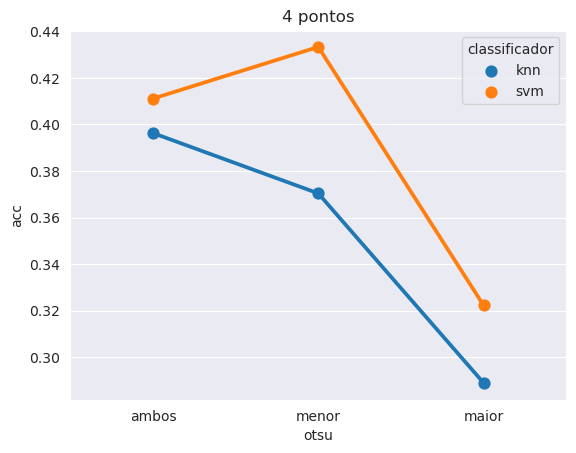

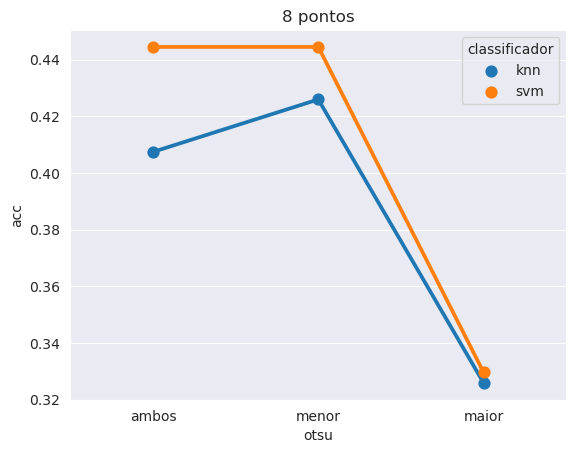

,acc,otsu,pontos,classificador
0,0.396296,ambos,4,knn
1,0.370370,menor,4,knn
2,0.288889,maior,4,knn
3,0.411111,ambos,4,svm
4,0.433333,menor,4,svm
5,0.322222,maior,4,svm
6,0.407407,ambos,8,knn
7,0.425926,menor,8,knn
8,0.325926,maior,8,knn
9,0.444444,ambos,8,svm


In [4]:
sns.set_style('darkgrid')

df = pd.DataFrame(data=combinations, columns=COLUMNS)

for p, group in df.groupby('pontos'):
  sns.pointplot(
    data=group,
    x='otsu',
    y='acc',
    hue='classificador'
  ).set(
    title=f'{p} pontos')
  plt.show()

df